# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_key}&units={units}&q="

In [4]:
#create empty lists as variable to hold data per cities list index

lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
name = []

In [5]:
response = requests.get(query_url + city).json()

In [6]:
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        lat.append(response["coord"]["lat"])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        name.append(response['name'])
    except KeyError:
        print("City Not Found")
        pass
        
    response = requests.get(query_url + city).json()
    print(response)

{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.18, 'feels_like': 77.88, 'temp_min': 77.18, 'temp_max': 77.18, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 18.32, 'deg': 99, 'gust': 19.17}, 'clouds': {'all': 5}, 'dt': 1659152116, 'sys': {'country': 'PF', 'sunrise': 1659108739, 'sunset': 1659150760}, 'timezone': -34200, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.87, 'feels_like': 63.03, 'temp_min': 64.87, 'temp_max': 64.87, 'pressure': 1007, 'humidity': 42, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 212, 'gust': 14.18},

{'coord': {'lon': 127.4902, 'lat': 50.2441}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.98, 'feels_like': 83.35, 'temp_min': 82.4, 'temp_max': 82.98, 'pressure': 1007, 'humidity': 47, 'sea_level': 1007, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 7.11, 'deg': 203, 'gust': 8.03}, 'rain': {'1h': 0.65}, 'clouds': {'all': 100}, 'dt': 1659152121, 'sys': {'type': 1, 'id': 8859, 'country': 'CN', 'sunrise': 1659124492, 'sunset': 1659179875}, 'timezone': 28800, 'id': 2036973, 'name': 'Heihe', 'cod': 200}
{'coord': {'lon': -38.8828, 'lat': -15.8631}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.16, 'feels_like': 72.88, 'temp_min': 72.16, 'temp_max': 72.16, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 11.81, 'deg': 10, 'gust': 18.79}, 'clouds': {'all': 4

{'coord': {'lon': 112.4, 'lat': 66.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.46, 'feels_like': 82.49, 'temp_min': 80.46, 'temp_max': 80.46, 'pressure': 999, 'humidity': 61, 'sea_level': 999, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 10.51, 'deg': 94, 'gust': 13.13}, 'clouds': {'all': 92}, 'dt': 1659152127, 'sys': {'type': 2, 'id': 49565, 'country': 'RU', 'sunrise': 1659121245, 'sunset': 1659190365}, 'timezone': 32400, 'id': 2014624, 'name': 'Udachny', 'cod': 200}
{'coord': {'lon': 24.4336, 'lat': 0.8102}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 67.89, 'feels_like': 68.94, 'temp_min': 67.89, 'temp_max': 67.89, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 44, 'gust': 4.76}, 'rain': {'1h': 1.06}, 'clouds': {'all'

{'coord': {'lon': -97.0667, 'lat': 15.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.43, 'feels_like': 84.47, 'temp_min': 81.43, 'temp_max': 81.43, 'pressure': 1013, 'humidity': 65}, 'visibility': 8047, 'wind': {'speed': 3.44, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1659152089, 'sys': {'type': 1, 'id': 7157, 'country': 'MX', 'sunrise': 1659096534, 'sunset': 1659142821}, 'timezone': -18000, 'id': 3520994, 'name': 'Puerto Escondido', 'cod': 200}
{'coord': {'lon': 159.95, 'lat': -9.4333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.63, 'feels_like': 92.32, 'temp_min': 86.63, 'temp_max': 86.63, 'pressure': 1009, 'humidity': 60, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 27, 'gust': 5.75}, 'clouds': {'all': 76}, 'dt': 1659152132, 'sys': {'country': 'SB', 'sunrise': 16

{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.49, 'feels_like': 48.42, 'temp_min': 49.91, 'temp_max': 53.89, 'pressure': 1018, 'humidity': 44, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg': 317, 'gust': 10.63}, 'clouds': {'all': 5}, 'dt': 1659152137, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1659129947, 'sunset': 1659165027}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -11.3686, 'lat': 6.7533}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.15, 'feels_like': 76.86, 'temp_min': 76.15, 'temp_max': 76.15, 'pressure': 1014, 'humidity': 72, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 

{'coord': {'lon': -86.1758, 'lat': 39.447}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.65, 'feels_like': 66.72, 'temp_min': 63.48, 'temp_max': 69.98, 'pressure': 1019, 'humidity': 79, 'sea_level': 1019, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 350, 'gust': 2.93}, 'clouds': {'all': 96}, 'dt': 1659152142, 'sys': {'type': 2, 'id': 2006000, 'country': 'US', 'sunrise': 1659091297, 'sunset': 1659142830}, 'timezone': -14400, 'id': 4255151, 'name': 'Bud', 'cod': 200}
{'coord': {'lon': 141.4333, 'lat': -31.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.62, 'feels_like': 55.87, 'temp_min': 58.62, 'temp_max': 58.62, 'pressure': 1021, 'humidity': 36, 'sea_level': 1021, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 14.47, 'deg': 4, 'gust': 15.48}, 'clouds': {'all': 94}, 'dt': 1

{'coord': {'lon': -76.5119, 'lat': 38.8876}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.51, 'feels_like': 74.79, 'temp_min': 72.09, 'temp_max': 76.17, 'pressure': 1008, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1659152146, 'sys': {'type': 2, 'id': 2005357, 'country': 'US', 'sunrise': 1659089058, 'sunset': 1659140431}, 'timezone': -14400, 'id': 4362001, 'name': 'Mayo', 'cod': 200}
{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.21, 'feels_like': 64.17, 'temp_min': 65.21, 'temp_max': 65.21, 'pressure': 1019, 'humidity': 58, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 17.36, 'deg': 136, 'gust': 18.68}, 'clouds': {'all': 100}, 'dt': 1659152147, 'sys': {'country': 'AU', 'sunris

{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.29, 'feels_like': 76.95, 'temp_min': 75.29, 'temp_max': 75.29, 'pressure': 1007, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1659152151, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1659146562, 'sunset': 1659193035}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}
{'coord': {'lon': 179.3167, 'lat': 63.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 49.24, 'feels_like': 46.71, 'temp_min': 49.24, 'temp_max': 49.24, 'pressure': 1021, 'humidity': 78, 'sea_level': 1021, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 6.13, 'deg': 117, 'gust': 5.82}, 'clouds': {'all': 100}, 'dt': 1659152152, 'sys': {'country': 'RU', 'sunrise': 1659107

{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 45.81, 'feels_like': 40.78, 'temp_min': 45.81, 'temp_max': 45.81, 'pressure': 1011, 'humidity': 69, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 301, 'gust': 13.4}, 'clouds': {'all': 84}, 'dt': 1659152156, 'sys': {'type': 2, 'id': 2008959, 'country': 'NZ', 'sunrise': 1659125469, 'sunset': 1659159294}, 'timezone': 43200, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.43, 'feels_like': 76.26, 'temp_min': 74.43, 'temp_max': 78.22, 'pressure': 1013, 'humidity': 100}, 'visibility': 6437, 'wind': {'speed': 5.75, 'deg': 150}, 'clouds': {'all': 100}, 'dt

{'coord': {'lon': -173.3, 'lat': 64.3833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.3, 'feels_like': 50.43, 'temp_min': 52.3, 'temp_max': 52.3, 'pressure': 1019, 'humidity': 68, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 140, 'gust': 2.91}, 'clouds': {'all': 100}, 'dt': 1659152161, 'sys': {'country': 'RU', 'sunrise': 1659191532, 'sunset': 1659257211}, 'timezone': 43200, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
{'coord': {'lon': -76.6886, 'lat': 3.6569}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.9, 'feels_like': 75.6, 'temp_min': 73.9, 'temp_max': 73.9, 'pressure': 1014, 'humidity': 98, 'sea_level': 1014, 'grnd_level': 913}, 'visibility': 3380, 'wind': {'speed': 1.48, 'deg': 270, 'gust': 2.04}, 'clouds': {'all': 96}, 'dt': 1659152162, 'sys': {'type':

{'coord': {'lon': -44.8683, 'lat': -1.8283}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.91, 'feels_like': 76.39, 'temp_min': 74.91, 'temp_max': 74.91, 'pressure': 1013, 'humidity': 91, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 43, 'gust': 13.98}, 'clouds': {'all': 11}, 'dt': 1659152167, 'sys': {'country': 'BR', 'sunrise': 1659171885, 'sunset': 1659215212}, 'timezone': -10800, 'id': 3401148, 'name': 'Cururupu', 'cod': 200}
{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.1, 'feels_like': 73.15, 'temp_min': 74.1, 'temp_max': 74.1, 'pressure': 1011, 'humidity': 41, 'sea_level': 1011, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 3.8, 'deg': 162, 'gust': 5.82}, 'clouds': {'all': 88}, 'dt': 1659152167, 'sys': {'country

{'coord': {'lon': 152.9167, 'lat': -31.4333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.89, 'feels_like': 61.56, 'temp_min': 62.89, 'temp_max': 62.89, 'pressure': 1026, 'humidity': 57, 'sea_level': 1026, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 186, 'gust': 8.86}, 'clouds': {'all': 66}, 'dt': 1659152172, 'sys': {'type': 2, 'id': 2037918, 'country': 'AU', 'sunrise': 1659127083, 'sunset': 1659165080}, 'timezone': 36000, 'id': 2152659, 'name': 'Port Macquarie', 'cod': 200}
{'coord': {'lon': -15.9785, 'lat': 18.0858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.73, 'feels_like': 78.73, 'temp_min': 78.73, 'temp_max': 78.73, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 19.3, 'deg': 240, 'gust': 24.63}, 'clouds': {'all'

{'coord': {'lon': 70.4667, 'lat': 43.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.39, 'feels_like': 79.39, 'temp_min': 79.39, 'temp_max': 79.39, 'pressure': 1008, 'humidity': 25, 'sea_level': 1008, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 4, 'gust': 4.99}, 'clouds': {'all': 6}, 'dt': 1659152177, 'sys': {'country': 'KZ', 'sunrise': 1659139556, 'sunset': 1659192182}, 'timezone': 21600, 'id': 1519938, 'name': 'Karatau', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': 62.3254, 'lat': 25.1216}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.79, 'feels_like': 88.03, 'temp_min': 81.79, 'temp_max': 81.79, 'pressure': 1006, 'humidity': 79, 'sea_level': 1006, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 8.43, 'deg': 233, 'gust': 8.3}, 'rain': {'1

{'coord': {'lon': 36.2, 'lat': 36.9559}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.41, 'feels_like': 77.72, 'temp_min': 77.41, 'temp_max': 77.41, 'pressure': 1007, 'humidity': 61, 'sea_level': 1007, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 0.63, 'deg': 139, 'gust': 2.15}, 'clouds': {'all': 0}, 'dt': 1659152183, 'sys': {'country': 'TR', 'sunrise': 1659148711, 'sunset': 1659199474}, 'timezone': 10800, 'id': 296852, 'name': 'Erzin', 'cod': 200}
{'coord': {'lon': -67.6236, 'lat': 5.6639}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.34, 'feels_like': 75.85, 'temp_min': 74.34, 'temp_max': 74.34, 'pressure': 1014, 'humidity': 93, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 181, 'gust': 3.38}, 'clouds': {'all': 100}, 'dt': 1659152183, 'sys': {'country': 'VE',

{'coord': {'lon': 32.3382, 'lat': 59.9258}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.72, 'feels_like': 55.45, 'temp_min': 55.72, 'temp_max': 55.72, 'pressure': 1014, 'humidity': 95, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.99, 'deg': 240, 'gust': 19.95}, 'clouds': {'all': 99}, 'dt': 1659152188, 'sys': {'country': 'RU', 'sunrise': 1659144402, 'sunset': 1659205637}, 'timezone': 10800, 'id': 472722, 'name': 'Volkhov', 'cod': 200}
{'coord': {'lon': 13.3017, 'lat': 37.8134}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.78, 'feels_like': 73.2, 'temp_min': 69.04, 'temp_max': 76.75, 'pressure': 1015, 'humidity': 50, 'sea_level': 1015, 'grnd_level': 954}, 'visibility': 10000, 'wind': {'speed': 0.76, 'deg': 249, 'gust': 1.41}, 'clouds': {'all': 0}, 'dt': 1659152188, 'sys': {'type': 2, '

{'coord': {'lon': -38.3242, 'lat': -12.6975}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.77, 'feels_like': 78.51, 'temp_min': 76.77, 'temp_max': 76.77, 'pressure': 1015, 'humidity': 93, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.12, 'deg': 62, 'gust': 12.3}, 'clouds': {'all': 6}, 'dt': 1659152192, 'sys': {'type': 1, 'id': 8454, 'country': 'BR', 'sunrise': 1659171200, 'sunset': 1659212757}, 'timezone': -10800, 'id': 3468031, 'name': 'Camaçari', 'cod': 200}
{'coord': {'lon': 44.3244, 'lat': 15.1718}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.42, 'feels_like': 63.37, 'temp_min': 64.42, 'temp_max': 64.42, 'pressure': 1012, 'humidity': 60, 'sea_level': 1012, 'grnd_level': 763}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 261, 'gust': 4.21}, 'clouds': {'all': 58}, 'dt': 1659152

{'coord': {'lon': -156.47, 'lat': 20.8947}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.82, 'feels_like': 91.09, 'temp_min': 83.97, 'temp_max': 87.82, 'pressure': 1016, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 320, 'gust': 21.85}, 'clouds': {'all': 0}, 'dt': 1659152197, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1659110329, 'sunset': 1659157539}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.8, 'feels_like': 91.35, 'temp_min': 82.35, 'temp_max': 85.89, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 13.89, 'deg': 151, 'gust': 22.19}, 'clouds': {'all': 0}, 'dt': 1659152197, 'sys': {'type': 2, 'id': 2040001, 'coun

{'coord': {'lon': 94.7667, 'lat': 28.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.37, 'feels_like': 89.35, 'temp_min': 81.37, 'temp_max': 81.37, 'pressure': 1008, 'humidity': 89, 'sea_level': 1008, 'grnd_level': 967}, 'visibility': 8729, 'wind': {'speed': 0.58, 'deg': 39, 'gust': 1.66}, 'clouds': {'all': 86}, 'dt': 1659152201, 'sys': {'country': 'IN', 'sunrise': 1659135705, 'sunset': 1659184369}, 'timezone': 19800, 'id': 1278969, 'name': 'Along', 'cod': 200}
{'coord': {'lon': -101.9188, 'lat': 34.9803}, 'weather': [{'id': 503, 'main': 'Rain', 'description': 'very heavy rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 66.42, 'feels_like': 66.79, 'temp_min': 64.47, 'temp_max': 68.68, 'pressure': 1018, 'humidity': 86, 'sea_level': 1018, 'grnd_level': 899}, 'visibility': 10000, 'wind': {'speed': 7.16, 'deg': 64, 'gust': 10.29}, 'rain': {'1h': 42.11}, 'clouds': {'all': 100}, 'dt': 1659

{'coord': {'lon': 10, 'lat': -2.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.74, 'feels_like': 69.73, 'temp_min': 68.74, 'temp_max': 68.74, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 153, 'gust': 3.11}, 'clouds': {'all': 71}, 'dt': 1659152206, 'sys': {'country': 'GA', 'sunrise': 1659158784, 'sunset': 1659201978}, 'timezone': 3600, 'id': 2400547, 'name': 'Gamba', 'cod': 200}
{'coord': {'lon': -78.6328, 'lat': 21.6967}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.31, 'feels_like': 76.82, 'temp_min': 75.31, 'temp_max': 75.31, 'pressure': 1017, 'humidity': 91, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 76, 'gust': 25.57}, 'clouds': {'all': 66}, 'dt': 1659152206, 'sys': {'country': 'CU'

{'coord': {'lon': 77.5, 'lat': 8.8667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86.09, 'feels_like': 91.27, 'temp_min': 86.09, 'temp_max': 86.09, 'pressure': 1009, 'humidity': 60, 'sea_level': 1009, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 223, 'gust': 3.18}, 'clouds': {'all': 45}, 'dt': 1659152211, 'sys': {'country': 'IN', 'sunrise': 1659141647, 'sunset': 1659186715}, 'timezone': 19800, 'id': 1279058, 'name': 'Ālangulam', 'cod': 200}
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 57.09, 'feels_like': 56.91, 'temp_min': 57.09, 'temp_max': 57.09, 'pressure': 1016, 'humidity': 94}, 'visibility': 4828, 'wind': {'speed': 3.44, 'deg': 320}, 'clouds': {'all': 100}, 'dt': 1

{'coord': {'lon': 37.1841, 'lat': 35.3029}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.76, 'feels_like': 78.76, 'temp_min': 78.76, 'temp_max': 78.76, 'pressure': 1007, 'humidity': 37, 'sea_level': 1007, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 227, 'gust': 7.83}, 'clouds': {'all': 0}, 'dt': 1659152215, 'sys': {'country': 'SY', 'sunrise': 1659148692, 'sunset': 1659199021}, 'timezone': 10800, 'id': 172515, 'name': 'Abu Samrah', 'cod': 200}
{'coord': {'lon': 128.1814, 'lat': -3.6954}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.54, 'feels_like': 91.02, 'temp_min': 82.54, 'temp_max': 82.54, 'pressure': 1009, 'humidity': 83}, 'visibility': 9000, 'wind': {'speed': 5.75, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1659152215, 'sys': {'type': 1, 'id': 9361, 'country': 'ID', 'sunrise': 1659130506,

{'coord': {'lon': -65.7852, 'lat': -28.4696}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.59, 'feels_like': 54.01, 'temp_min': 56.59, 'temp_max': 56.59, 'pressure': 1014, 'humidity': 44, 'sea_level': 1014, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 11.3, 'deg': 22, 'gust': 19.1}, 'clouds': {'all': 0}, 'dt': 1659152220, 'sys': {'type': 2, 'id': 2004347, 'country': 'AR', 'sunrise': 1659179232, 'sunset': 1659217906}, 'timezone': -10800, 'id': 3837702, 'name': 'San Fernando del Valle de Catamarca', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': 114.6517, 'lat': 37.8792}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.16, 'feels_like': 89.67, 'temp_min': 86.16, 'temp_max': 86.16, 'pressure': 1007, 'humidity': 55, 'sea_level': 1007, 'grnd_level': 1001}, 'visibility': 10000, 

{'cod': '404', 'message': 'city not found'}
City Not Found
{'coord': {'lon': -70.027, 'lat': 12.524}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.55, 'feels_like': 85.08, 'temp_min': 80.55, 'temp_max': 80.55, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1659152226, 'sys': {'type': 1, 'id': 8791, 'country': 'AW', 'sunrise': 1659090336, 'sunset': 1659136040}, 'timezone': -14400, 'id': 3577154, 'name': 'Oranjestad', 'cod': 200}
{'coord': {'lon': -7.3528, 'lat': 4.423}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.04, 'feels_like': 73.62, 'temp_min': 73.04, 'temp_max': 73.04, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.61, 'deg': 227, 'gust': 7.54}, 'clouds': {'all': 42}, 'd

{'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.12, 'feels_like': 81.5, 'temp_min': 83.12, 'temp_max': 83.12, 'pressure': 1008, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 99}, 'dt': 1659152231, 'sys': {'type': 1, 'id': 9014, 'country': 'UZ', 'sunrise': 1659139688, 'sunset': 1659191449}, 'timezone': 18000, 'id': 1513491, 'name': 'Yangi Marg`ilon', 'cod': 200}
{'coord': {'lon': 140.5894, 'lat': 40.7072}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.02, 'feels_like': 96.12, 'temp_min': 82.9, 'temp_max': 88.02, 'pressure': 1014, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1659152231, 'sys': {'type': 1, 'id': 8044, 'country': 'JP', 'sunrise': 1659123106, 'sunset': 1659174974},

{'coord': {'lon': 96.1667, 'lat': 27.9167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.22, 'feels_like': 93.43, 'temp_min': 84.22, 'temp_max': 84.22, 'pressure': 1007, 'humidity': 77, 'sea_level': 1007, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 186, 'gust': 2.21}, 'clouds': {'all': 99}, 'dt': 1659152237, 'sys': {'country': 'IN', 'sunrise': 1659135396, 'sunset': 1659184006}, 'timezone': 19800, 'id': 1254709, 'name': 'Tezu', 'cod': 200}
{'coord': {'lon': 45.1914, 'lat': -12.9067}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.55, 'feels_like': 70.63, 'temp_min': 69.55, 'temp_max': 69.55, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1659152237, 'sys': {'type': 1, 'id': 2131, 'country': 'YT', 'sunrise': 1659151177, 'su

{'coord': {'lon': 175.7, 'lat': -36.8333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 58.39, 'feels_like': 57.74, 'temp_min': 58.39, 'temp_max': 58.39, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 3, 'gust': 15.64}, 'clouds': {'all': 18}, 'dt': 1659152241, 'sys': {'country': 'NZ', 'sunrise': 1659122255, 'sunset': 1659158972}, 'timezone': 43200, 'id': 2179103, 'name': 'Whitianga', 'cod': 200}
{'coord': {'lon': 138.1667, 'lat': 56.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 58.06, 'feels_like': 58.14, 'temp_min': 58.06, 'temp_max': 58.06, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 7862, 'wind': {'speed': 19.73, 'deg': 29, 'gust': 28.05}, 'rain': {'1h': 0.99}, 'clouds': {'all': 100}, 'dt': 1659152242, '

{'coord': {'lon': -108.05, 'lat': 25.0833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.11, 'feels_like': 84.2, 'temp_min': 80.11, 'temp_max': 80.11, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 54, 'gust': 4.16}, 'clouds': {'all': 60}, 'dt': 1659152246, 'sys': {'country': 'MX', 'sunrise': 1659098291, 'sunset': 1659146336}, 'timezone': -21600, 'id': 4000490, 'name': 'La Reforma', 'cod': 200}
{'coord': {'lon': 31.2333, 'lat': -7.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.03, 'feels_like': 69.28, 'temp_min': 70.03, 'temp_max': 70.03, 'pressure': 1014, 'humidity': 54, 'sea_level': 1014, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 8.79, 'deg': 130, 'gust': 22.26}, 'clouds': {'all': 98}, 'dt': 1659152247, 'sys': {'coun

{'coord': {'lon': 108.9833, 'lat': 53.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 56.89, 'feels_like': 56.8, 'temp_min': 56.89, 'temp_max': 56.89, 'pressure': 1002, 'humidity': 96, 'sea_level': 1002, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 42, 'gust': 4.34}, 'rain': {'1h': 0.29}, 'clouds': {'all': 100}, 'dt': 1659152251, 'sys': {'country': 'RU', 'sunrise': 1659128148, 'sunset': 1659185102}, 'timezone': 28800, 'id': 2013986, 'name': "Ust'-Barguzin", 'cod': 200}
{'coord': {'lon': -117.0333, 'lat': 32.3333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.39, 'feels_like': 67.5, 'temp_min': 66.11, 'temp_max': 68.95, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.87, 'deg': 275, 'gust': 2.95}, 'clouds': {'all': 45}, 'dt': 16

{'coord': {'lon': 27.8492, 'lat': 71.0357}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.55, 'feels_like': 52.18, 'temp_min': 51.71, 'temp_max': 53.55, 'pressure': 1024, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 180}, 'clouds': {'all': 78}, 'dt': 1659152257, 'sys': {'type': 1, 'id': 1633, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 778707, 'name': 'Mehamn', 'cod': 200}
{'coord': {'lon': 49.05, 'lat': -13.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.98, 'feels_like': 67.96, 'temp_min': 67.98, 'temp_max': 67.98, 'pressure': 1018, 'humidity': 74, 'sea_level': 1018, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 95, 'gust': 7.47}, 'clouds': {'all': 7}, 'dt': 1659152257, 'sys': {'country': 'MG', 'sunrise': 1659150276, 'sunset': 1659191741}, 'time

{'coord': {'lon': -109.4848, 'lat': 49.9168}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.01, 'feels_like': 80.2, 'temp_min': 81.01, 'temp_max': 81.01, 'pressure': 1009, 'humidity': 35, 'sea_level': 1009, 'grnd_level': 925}, 'visibility': 10000, 'wind': {'speed': 7.65, 'deg': 138, 'gust': 12.19}, 'clouds': {'all': 67}, 'dt': 1659152262, 'sys': {'type': 1, 'id': 536, 'country': 'CA', 'sunrise': 1659095011, 'sunset': 1659150305}, 'timezone': -21600, 'id': 6065592, 'name': 'Maple Creek', 'cod': 200}
{'coord': {'lon': -66.8654, 'lat': 50.0334}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.84, 'feels_like': 56.82, 'temp_min': 56.75, 'temp_max': 57.42, 'pressure': 1004, 'humidity': 98, 'sea_level': 1004, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 239, 'gust': 3.8}, 'clouds': {'all': 94}, 'd

{'coord': {'lon': -87.6901, 'lat': 42.0411}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.31, 'feels_like': 68.13, 'temp_min': 61.27, 'temp_max': 73.11, 'pressure': 1020, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1659152267, 'sys': {'type': 2, 'id': 2038650, 'country': 'US', 'sunrise': 1659091263, 'sunset': 1659143592}, 'timezone': -18000, 'id': 4891382, 'name': 'Evanston', 'cod': 200}
{'coord': {'lon': 20.2263, 'lat': 30.7554}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.86, 'feels_like': 77.4, 'temp_min': 76.86, 'temp_max': 76.86, 'pressure': 1012, 'humidity': 67, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.13, 'deg': 15, 'gust': 6.44}, 'clouds': {'all': 0}, 'dt': 1659152267, 'sys': {'country': 'LY', 'sunrise': 1659153314, 'sunset':

{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.11, 'feels_like': 38.64, 'temp_min': 41.11, 'temp_max': 41.11, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 3.96, 'deg': 192, 'gust': 8.19}, 'clouds': {'all': 100}, 'dt': 1659152272, 'sys': {'country': 'NZ', 'sunrise': 1659125414, 'sunset': 1659159645}, 'timezone': 43200, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}
{'coord': {'lon': 133.8833, 'lat': -23.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.22, 'feels_like': 67.35, 'temp_min': 69.22, 'temp_max': 71.15, 'pressure': 1004, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 330}, 'clouds': {'all': 97}, 'dt': 1659152272, 'sys': {'type': 2, 'id': 268586, 'country': 'AU', 'sunrise': 

{'coord': {'lon': 9.8105, 'lat': 48.6854}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.6, 'feels_like': 58.53, 'temp_min': 55.8, 'temp_max': 61.27, 'pressure': 1016, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.39, 'deg': 271, 'gust': 9.15}, 'clouds': {'all': 5}, 'dt': 1659152277, 'sys': {'type': 2, 'id': 2004160, 'country': 'DE', 'sunrise': 1659153100, 'sunset': 1659207752}, 'timezone': 7200, 'id': 2936186, 'name': 'Donzdorf', 'cod': 200}
{'coord': {'lon': 73.8282, 'lat': 57.1281}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.37, 'feels_like': 68.74, 'temp_min': 69.37, 'temp_max': 69.37, 'pressure': 1010, 'humidity': 58, 'sea_level': 1010, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 8.28, 'deg': 22, 'gust': 13.6}, 'clouds': {'all': 2}, 'dt': 1659152277, 'sys': {'country': 'RU', 'sunrise': 1659135

{'coord': {'lon': 18.3553, 'lat': 39.9304}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.31, 'feels_like': 73.49, 'temp_min': 73.31, 'temp_max': 75.31, 'pressure': 1012, 'humidity': 67, 'sea_level': 1012, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 2, 'gust': 7.05}, 'clouds': {'all': 0}, 'dt': 1659152282, 'sys': {'type': 2, 'id': 2009376, 'country': 'IT', 'sunrise': 1659152577, 'sunset': 1659204173}, 'timezone': 7200, 'id': 2522857, 'name': 'Tricase', 'cod': 200}
{'coord': {'lon': 29.9553, 'lat': 31.2156}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.16, 'feels_like': 76.05, 'temp_min': 73.94, 'temp_max': 75.16, 'pressure': 1007, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1659152282, 'sys': {'type': 1, 'id': 2511, 'country': 'EG', 'sunrise': 16

{'coord': {'lon': 25.8, 'lat': 45.7833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 60.91, 'feels_like': 61.39, 'temp_min': 59.34, 'temp_max': 64.8, 'pressure': 1017, 'humidity': 100, 'sea_level': 1017, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 85, 'gust': 3.8}, 'clouds': {'all': 14}, 'dt': 1659152287, 'sys': {'type': 2, 'id': 2039162, 'country': 'RO', 'sunrise': 1659149828, 'sunset': 1659203350}, 'timezone': 10800, 'id': 682147, 'name': 'Chichiş', 'cod': 200}
{'coord': {'lon': 148.1667, 'lat': -33.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.45, 'feels_like': 52.63, 'temp_min': 55.45, 'temp_max': 55.45, 'pressure': 1025, 'humidity': 41, 'sea_level': 1025, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 6.55, 'deg': 2, 'gust': 8.25}, 'clouds': {'all': 0}, 'dt': 1659152288, 'sys': {

{'coord': {'lon': 70.8333, 'lat': 66.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.55, 'feels_like': 61.84, 'temp_min': 62.55, 'temp_max': 62.55, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 17.45, 'deg': 9, 'gust': 22.46}, 'clouds': {'all': 88}, 'dt': 1659152293, 'sys': {'country': 'RU', 'sunrise': 1659130865, 'sunset': 1659200697}, 'timezone': 18000, 'id': 1486321, 'name': 'Yar-Sale', 'cod': 200}
{'coord': {'lon': -3.3526, 'lat': 37.8406}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.58, 'feels_like': 77, 'temp_min': 77.58, 'temp_max': 77.58, 'pressure': 1015, 'humidity': 42, 'sea_level': 1015, 'grnd_level': 941}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 149, 'gust': 3.36}, 'clouds': {'all': 40}, 'dt': 1659152293, 'sys': {'typ

{'coord': {'lon': 152.75, 'lat': 61.3833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 62.44, 'feels_like': 60.03, 'temp_min': 62.44, 'temp_max': 62.44, 'pressure': 1009, 'humidity': 35, 'sea_level': 1009, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 220, 'gust': 1.79}, 'clouds': {'all': 12}, 'dt': 1659152298, 'sys': {'country': 'RU', 'sunrise': 1659114798, 'sunset': 1659177444}, 'timezone': 39600, 'id': 2120769, 'name': 'Talaya', 'cod': 200}
{'coord': {'lon': 122.7617, 'lat': 63.8986}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.15, 'feels_like': 83.08, 'temp_min': 82.15, 'temp_max': 82.15, 'pressure': 999, 'humidity': 51, 'sea_level': 999, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 5.55, 'deg': 194, 'gust': 7.45}, 'clouds': {'all': 77}, 'dt': 1659152298, 'sys': {'country': 'RU

{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.26, 'feels_like': 70.02, 'temp_min': 69.26, 'temp_max': 69.26, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 12.17, 'deg': 194, 'gust': 15.43}, 'clouds': {'all': 100}, 'dt': 1659152303, 'sys': {'country': 'JP', 'sunrise': 1659121491, 'sunset': 1659174196}, 'timezone': 32400, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
{'coord': {'lon': 40.4939, 'lat': 38.8847}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.69, 'feels_like': 77.29, 'temp_min': 78.69, 'temp_max': 78.69, 'pressure': 1008, 'humidity': 22, 'sea_level': 1008, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 27, 'gust': 6.71}, 'clouds': {'all': 0}, 'dt': 1659152303, 'sys': {'country': 

{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.95, 'feels_like': 71.51, 'temp_min': 70.95, 'temp_max': 73.35, 'pressure': 1016, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1659152308, 'sys': {'type': 2, 'id': 2012383, 'country': 'BR', 'sunrise': 1659172334, 'sunset': 1659212568}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
{'coord': {'lon': 18.75, 'lat': -28.0167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 41.41, 'feels_like': 38.32, 'temp_min': 41.41, 'temp_max': 41.41, 'pressure': 1022, 'humidity': 87, 'sea_level': 1022, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 4.76, 'deg': 253, 'gust': 4.76}, 'clouds': {'all': 22}, 'dt': 1659152308, 'sys': {'country': 'NA', 'sunrise': 1

## * Note * API Call lists Min Temp, Max Temp, and Temp as Equal Values

In [7]:
city_data_df = pd.DataFrame({'City': name, 
                            'Latitude': lat, 
                            'Temperature': temp, 
                            'Humidity': humidity, 
                            'Cloudiness': cloudiness, 
                            'Wind Speed': windspeed, 
                            'Country': country})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Save data to csv

city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [9]:
city_data_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Hermanus,-34.4187,44.80,77,99,9.40,ZA
1,Atuona,-9.8000,77.18,70,5,18.32,PF
2,Chokurdakh,70.6333,64.87,42,70,10.29,RU
3,Solnechnyy,50.7214,73.94,90,97,6.38,RU
4,Celestún,20.8667,77.23,82,7,13.71,MX
...,...,...,...,...,...,...,...
582,Goma,-1.6792,61.90,85,59,1.48,CD
583,Aswān,24.0934,87.10,21,0,3.44,EG
584,Ahipara,-35.1667,59.47,69,60,11.36,NZ
585,Garden City,42.3256,68.32,64,0,9.22,US


In [10]:
city_data_df.drop_duplicates()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Hermanus,-34.4187,44.80,77,99,9.40,ZA
1,Atuona,-9.8000,77.18,70,5,18.32,PF
2,Chokurdakh,70.6333,64.87,42,70,10.29,RU
3,Solnechnyy,50.7214,73.94,90,97,6.38,RU
4,Celestún,20.8667,77.23,82,7,13.71,MX
...,...,...,...,...,...,...,...
582,Goma,-1.6792,61.90,85,59,1.48,CD
583,Aswān,24.0934,87.10,21,0,3.44,EG
584,Ahipara,-35.1667,59.47,69,60,11.36,NZ
585,Garden City,42.3256,68.32,64,0,9.22,US


In [2]:
csv_path = "city_data.csv"
city_data_df = pd.read_csv(csv_path, encoding="UTF-8")
city_data_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Hermanus,-34.4187,44.80,77,99,9.40,ZA
1,Atuona,-9.8000,77.18,70,5,18.32,PF
2,Chokurdakh,70.6333,64.87,42,70,10.29,RU
3,Solnechnyy,50.7214,73.94,90,97,6.38,RU
4,Celestún,20.8667,77.23,82,7,13.71,MX


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
city_data_df.sort_values(by='Humidity', ascending=False)

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
123,Ixtapa,20.7000,74.43,100,100,5.75,MX
207,Clyde River,70.4692,39.43,100,100,11.50,CA
298,Puerto Madero,14.7208,80.80,100,75,0.00,MX
489,Andenes,69.3143,49.98,100,43,5.75,NO
515,Chichiş,45.7833,60.91,100,14,3.36,RO
...,...,...,...,...,...,...,...
141,Port Hedland,-20.3167,82.45,14,3,10.36,AU
196,Sakakah,29.9697,85.57,13,2,3.85,SA
572,Rāwah,34.4816,91.85,11,36,7.31,IQ
160,Winnemucca,40.9730,93.25,10,0,9.22,US


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## </span>Latitude vs. Temperature Plot

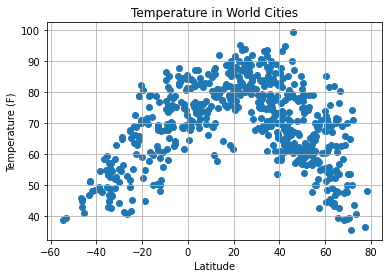

In [9]:
# Build a scatter plot for Temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Humidity Plot

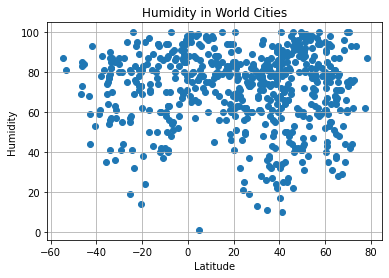

In [10]:
# Build a scatter plot for Humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Cloudiness Plot

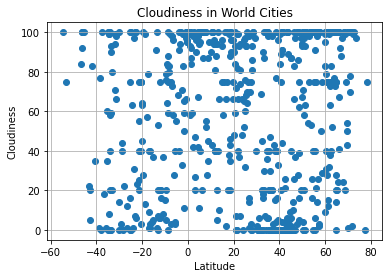

In [11]:
# Build a scatter plot for Cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## </span>Latitude vs. Wind Speed Plot

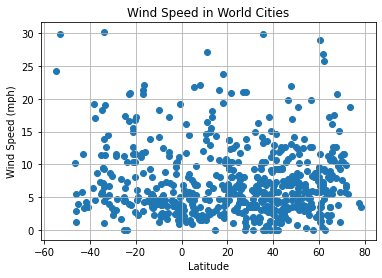

In [12]:
# Build a scatter plot for Wind Speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [15]:
#split city dataframe into two hemispheres 
north_df = city_data_df.loc[city_data_df['Latitude'] > 0]
south_df = city_data_df.loc[city_data_df['Latitude'] < 0]

In [16]:
south_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Hermanus,-34.4187,44.80,77,99,9.40,ZA
1,Atuona,-9.8000,77.18,70,5,18.32,PF
10,Vaini,-21.2000,78.96,89,40,11.50,TO
14,Padang,-0.9492,80.65,95,100,0.94,ID
15,Hermanus,-34.4187,44.80,77,99,9.40,ZA


## Max Temp

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

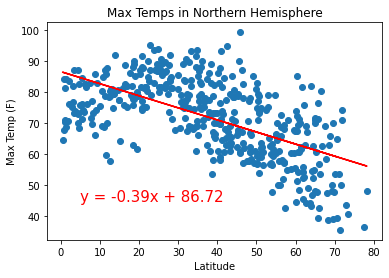

In [22]:
x_values = north_df['Latitude']
y_values = north_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Northern Hemisphere")

# Save the figure
plt.savefig("MaxTempsNorth.png")

plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

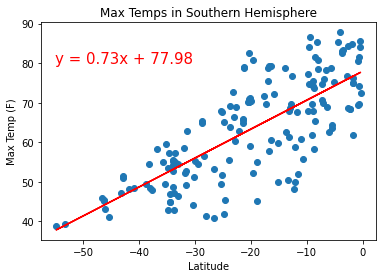

In [25]:
x_values = south_df['Latitude']
y_values = south_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Max Temps in Southern Hemisphere")

# Save the figure
plt.savefig("MaxTempsSouth.png")

plt.show()

#### Max Temp Description - Overall the trend is a general increase in temp toward the equator, however as 
#### evidenced in the Norther Hemisphere by an arching of the plots the peak maximum of temperatures appear
#### roughly ten degrees higher at approx the Tropic of Cancer. 

## Humidity

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

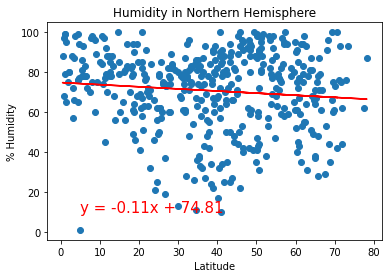

In [29]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Northern Hemisphere")

# Save the figure
plt.savefig("HumidityNorth.png")

plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

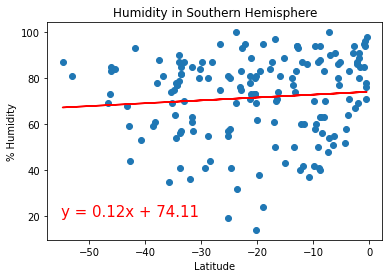

In [31]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Humidity in Southern Hemisphere")

# Save the figure
plt.savefig("HumiditySouth.png")

plt.show()

#### Humidity Description - Overall the trend is that there is less humidity south of the equator, and  
#### more humidity north of the equator. However as evidenced in both of these plots there does not appear 
#### to be any increase or decrease related to the equator, or approaching the equator.

## Cloudiness

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

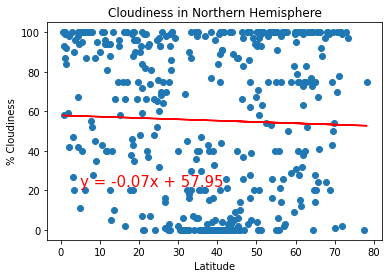

In [34]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Northern Hemisphere")

# Save the figure
plt.savefig("CloudinessNorth.png")

plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

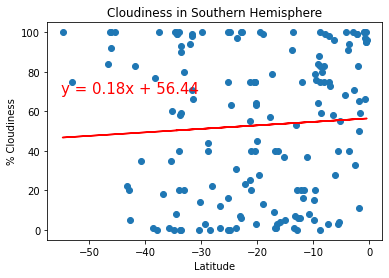

In [36]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,69),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Cloudiness in Southern Hemisphere")

# Save the figure
plt.savefig("CloudinessSouth.png")

plt.show()

#### Cloudiness Description - Overall the trend is that there are fewer clouds south of the equator, and  
#### more clouds north of the equator. This data logically corresponds well with the humidity data.

## Wind Speed

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

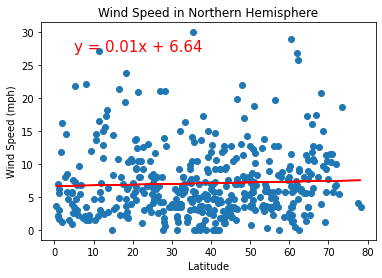

In [39]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Northern Hemisphere")

# Save the figure
plt.savefig("WindSpeedNorth.png")

plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

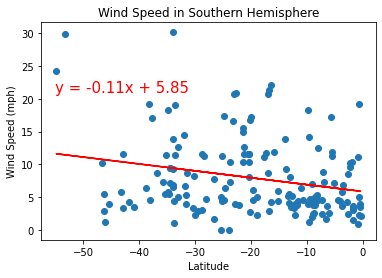

In [43]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed in Southern Hemisphere")

# Save the figure
plt.savefig("WindSpeedSouth.png")

plt.show()

#### Wind Speed Description - Overall the trend is that wind speed has very little relation to the equator.   
#### Perhaps a very slight relationship in the southern hemisphere. However as evidenced in both of these 
#### plots there is not a significant trend in either hemisphere.